# Exploring AirBnb In Athens

First, we import the necessary libraries and read the data. 


In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will primarily use the listings.csv file, which contains information about the listings in Athens.

In [177]:
listings = pd.read_csv('../data/listings.csv')

Lets perform a quick check to examine the available columns

In [178]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

And another one to get a sample of the data, we will use the sample() function for this purpose and select 5 random rows.

In [179]:
listings.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
303,5662266,Home in Athina · ★4.89 · 2 bedrooms · 3 beds ·...,29353642,Sabine,NaN,ΑΚΡΟΠΟΛΗ,37.971153,23.729937,Entire home/apt,150,7,18,2022-11-17,0.18,1,324,5,00001465790
10815,866691337158145096,Rental unit in Athina · 1 bedroom · 6 beds · 2...,33626433,Airnite,NaN,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,37.991588,23.730079,Shared room,20,1,0,NaN,NaN,18,364,0,01126280217
6089,49135372,Condo in Athina · ★4.91 · 2 bedrooms · 4 beds ...,181829489,Γιαννης,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.970930,23.732090,Entire home/apt,200,2,92,2023-09-19,4.37,2,331,46,00001758592
586,10325584,Condo in Athina · ★4.83 · 2 bedrooms · 3 beds ...,52909234,Elena,NaN,ΣΤΑΔΙΟ,37.966980,23.740360,Entire home/apt,77,3,36,2023-07-26,0.43,1,304,10,00000274242
3387,31102252,Condo in Athina · ★4.98 · 1 bedroom · 2 beds ·...,216454368,Γιάννης,NaN,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,37.963550,23.719710,Entire home/apt,65,2,44,2022-10-03,0.77,2,321,1,00001890400


# Listings Per Neighbourhood

Lets see how many listings are available per neighbourhood. We will use the ```value_counts()``` function on the neighbourhoods column for that.
<br>
We ensure that the results are sorted in descending popularity order by using the ```sort_values()``` function.

In [180]:
listings_per_neighbourhood = listings['neighbourhood'].value_counts().sort_values(ascending=False)

By far the most popular area for listings seems to be the commercial triangle of Athens witch is defined as the central area of the Municipality of Athens enclosed by the road axes of Stadiou, Mitropoleos and Athena street. This is the area where most of the tourist attractions are located, so it makes sense that it is the most popular area for listings.

# Neighbourhood Prices in Descending Order

Lets extract some metrics about neighbourhood prices. We will use the ```groupby()``` function to group the listings by neighbourhood and then perform aggregations on the price column. We will use the ```mean``` function of numpy to get the average price per neighbourhood, the ```mean``` function to get the mean price and the ```std``` and ```size``` to get the standard deviation and count of listings accordingly. We will also sort the results in descending order by median price.


In [181]:
listings_grouped_by_neighbourhood = listings.groupby('neighbourhood')
neighbourhood_prices = listings_grouped_by_neighbourhood['price'].agg([np.median, np.mean, np.std, np.size])
neighbourhood_prices = neighbourhood_prices.sort_values(by='median', ascending=False)
print(neighbourhood_prices)

                                  median        mean          std  size
neighbourhood                                                          
ΡΗΓΙΛΛΗΣ                           120.0  367.800000   578.622675     5
ΖΑΠΠΕΙΟ                            114.0  224.068323   641.163173   161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ             104.0  140.650662   229.183015  2416
ΑΚΡΟΠΟΛΗ                           100.0  195.344560   703.321565   386
ΚΟΛΩΝΑΚΙ                           100.0  128.595294   104.431349   425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 90.5  120.284314   104.613533  1122
ΘΗΣΕΙΟ                              90.0  126.492228   124.176775   386
ΚΕΡΑΜΕΙΚΟΣ                          89.0  123.883382   136.367487   343
ΛΥΚΑΒΗΤΤΟΣ                          75.0  104.561728    87.859850   162
ΓΚΑΖΙ                               70.5   95.792453    75.355882   106
ΣΤΑΔΙΟ                              70.0  121.515873   509.991840   252
ΙΛΙΣΙΑ                              70.0   87.189815    53.51901

Despite the fact that the commercial triangle is the most popular area for listings, it is not the most expensive one. The most expensive neighbourhood by median price is Riglis Street.

## Availability per Day

Lets see how many listings are available per day. We will use the calendar dataset for this purpose.
<br>
We load the dataset and take a quick look at the structure of the data.

In [182]:
calendar = pd.read_csv('../data/calendar.csv')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,$150.00,$60.00,1,180
1,10595,2023-09-22,t,$150.00,$60.00,1,180
2,10595,2023-09-23,t,$150.00,$75.00,1,180
3,10595,2023-09-24,t,$150.00,$90.00,1,180
4,10595,2023-09-25,f,$300.00,$210.00,1,180


We observe that availability is marked as a binary value, indicated by the t and f values.
<br>
We will filter for values that are equal to t and then group by date and count the number of listings available per day.
<br>
Replacing the t and f values with 1 and 0 respectively, would also be a good strategy, but considering that we are only interested in the number of listings available per day, it is not necessary.

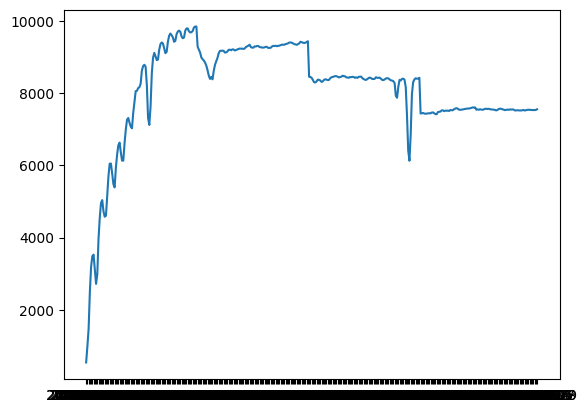

In [183]:
# Create a plot with the number of listings available per day, on the y axis, and the date, on the x axis.
x = calendar['date'].unique()
y = calendar[calendar['available'] == 't'].groupby('date').size()
_ = plt.plot(x,y)

As we can see, considering we are looking of a snapshot of all listings from a particular day in the past, the larger the timeframe the more chances of finding an available listing. This is up to the point of around 6 months where uncertanty of the hosts about their availability starts to increase so the available listings are becoming more and more scarce.  

## Reviews, Occupacy per Listing, Average Income


Let's see some facts about airbnb listings. First we will create a histogram to see the distribution of the number of reviews per listing. We will use the ```hist()``` function for this purpose.

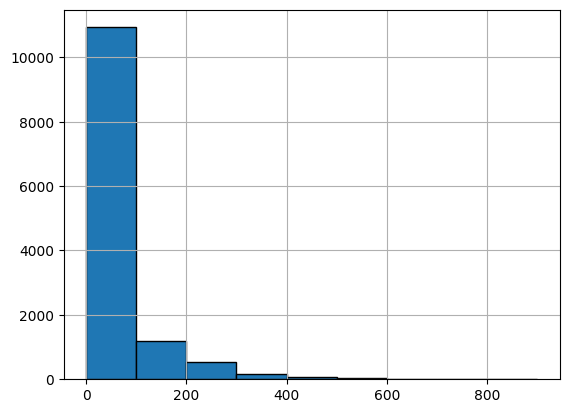

In [184]:
listing_reviews = listings['number_of_reviews']
_ = listing_reviews.hist(bins=np.arange(min(listing_reviews), max(listing_reviews) + 100, 100), edgecolor='black')

The vast majority of listings have less than 100 reviews. This indicates that most of listings are relatively new with the exception of some seasoned listing outliers reaching up to 600 reviews. We can also get an indicator that Airbnb is not actualy a popular choice for tourists in Athens assuming reviews are a sign of occupancy.

But how much do airbnb hosts earn? Lets try to find out. For that we are going to make some assumptions. First, we will assume that the number of reviews is a good indicator of occupancy. Second, we will assume that the average occupancy per listing per month is double the reviews per month. Third, we will assume that the average price per night is the global average price of the dataset and finally we will assume that each booking is for three nights stay. With these assumptions we can calculate the average income per listing per month.

In [185]:
avg_reviews_per_month = listings['reviews_per_month'].mean()
avg_occupacy_per_month = avg_reviews_per_month * 2
avg_price = listings['price'].mean()
avg_income_per_month = avg_occupacy_per_month * avg_price * 3
print(avg_income_per_month)


1190.1502553966434


The average income is 1190 euros witch is about the national average monthly salary.

Next, we will calculate the number of listings per room type, in absolute numbers. We can easily do that via the ```value_counts()``` function. We will also calculate the percentage of listings per room type by passing the ```normalize=True``` parameter to the ```value_counts()``` function.

In [186]:
listings['room_type'].value_counts()

room_type
Entire home/apt    11652
Private room        1113
Hotel room           105
Shared room           85
Name: count, dtype: int64

In [187]:
listings['room_type'].value_counts(normalize=True)

room_type
Entire home/apt    0.899421
Private room       0.085913
Hotel room         0.008105
Shared room        0.006561
Name: proportion, dtype: float64

As we can see almost 90% of the listings are entire homes or apartments. This is a clear indication that Airbnb is not used by locals to rent out a spare room in their house but rather by landlords to rent out entire apartments.

## Listings per Room Type


Next, we will calculate the listings per neighbourhood and room type. We will use the ```groupby()``` function to group the listings by neighbourhood and room type and take the count of each grouping dimension.

In [188]:
listings_per_neighbourhood_and_room_type = listings.groupby(['neighbourhood', 'room_type']).size()

## Prices per Day

We can take a look at how the listing prices fluctuate throughout the year. We will use the calendar dataset for this purpose. We will group the listings by date and take the mean price per day.

In [189]:
calendar.sample(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
718956,23135396,2024-05-30,f,$45.00,$45.00,2,1125
2518334,52747353,2024-03-19,t,$198.00,$198.00,1,1125
838305,24936729,2024-05-24,t,$120.00,$120.00,2,1125
547110,19966438,2024-08-07,f,$35.00,$35.00,7,1125
723000,23199176,2024-06-28,t,$142.00,$142.00,3,1125


But first we have to do some cleaning. As we can see from the sample, the price column contains dollar signs and commas. We will remove them and convert the column to float. For the sake of readability of the plot, we will also convert the date column to datetime.

In [190]:
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].str.replace(',', '.')
calendar['price'] = calendar['price'].str.replace('.00', '')
calendar['price'] = calendar['price'].astype(float)

calendar['date'] = pd.to_datetime(calendar['date'])

After that we can group by date and calculate the mean price across all listings for each date.

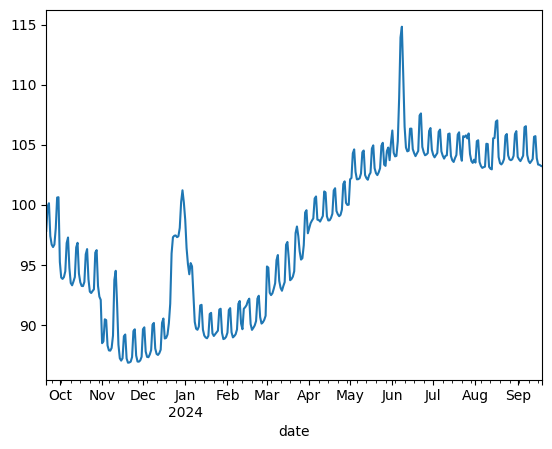

In [200]:
calendar_grouped_by_date = calendar.groupby('date')

calendar_mean_price = calendar_grouped_by_date['price'].mean()

_ = calendar_mean_price.plot()

Again, as expected, the prices are higher during the summer months and lower during the winter months with the exception of the Christmas period where prices are higher. This is a clear indication that the listings are more expensive during the tourist season.

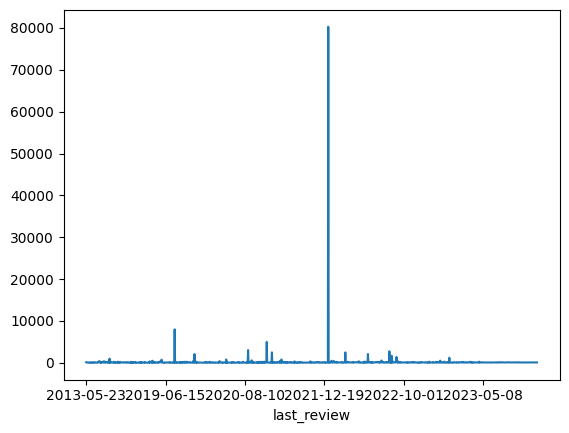

In [192]:
# Create a table with the average price per listing per day. Draw a graph visualizing the table.
# Needs work
# average_price_per_day = listings.groupby('last_review')['price'].mean()
# _ = average_price_per_day.plot()

## Listings per Host
We will now visualize the listings each host has. This will give us an indication of how many listings are managed by professional hosts. We will use the ```value_counts()``` function on the host_id column to get the number of listings per host and then we will use the ```scatter()``` function to plot the results.

We will sort the results in descending order by number of listings such as a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

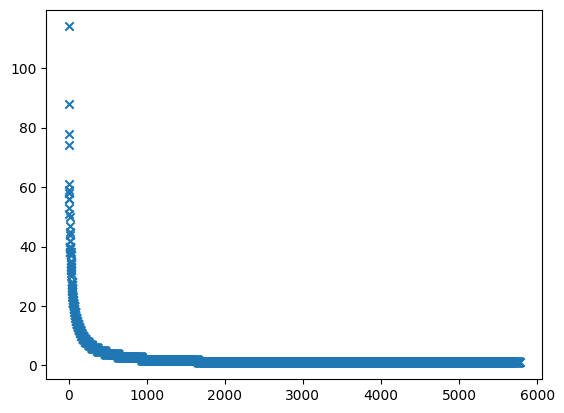

In [212]:
host_listings_sorted = listings['host_id'].value_counts().sort_values(ascending=False)
x = np.arange(1, len(host_listings_sorted) + 1)
y = host_listings_sorted.values
_ = plt.scatter(x, y, marker='x')

The graph is descending rapidly. In that case we can use a logarithmic scale to better visualize the results.

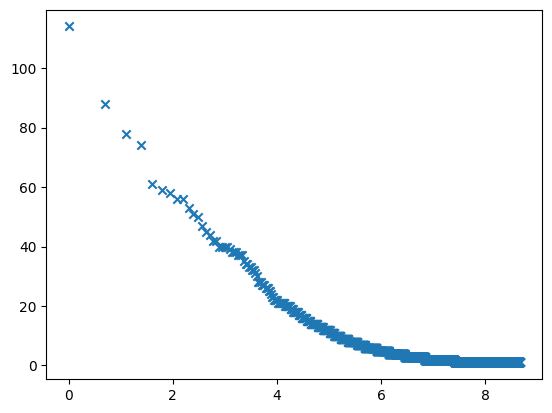

In [215]:
x = np.arange(1, len(host_listings_sorted) + 1)
x = np.log(x)
y = host_listings_sorted.values
_ = plt.scatter(x, y, marker='x')

## Visualize Listings

Lastly, we can visualize the listings on an interactive map. We will use the folium library for this purpose. We will create a map centered on Athens and then we will add a marker for each listing. We will also add a popup with basic information about the listing.

In [195]:
import folium as fl

In [216]:
# Get the coordinates of a sample listing as a starting point
sample_listing = listings.sample(1)
sample_listing_latitude = sample_listing['latitude'].values[0]
sample_listing_longitude = sample_listing['longitude'].values[0]

# Create a map with the sample listing as a starting point
ath_map = fl.Map(location=[sample_listing_latitude, sample_listing_longitude], zoom_start=12, max_zoom=15)

# Get the first 100 listings
listings_head = listings.head(100)

# Loop through each row in the dataframe
for i,row in listings_head.iterrows():

    # Create the html for the popup
    html = f"""<h3>{row['name']}</h3>

    <div>
        <p><strong>Host:</strong>{row['host_name']}</p>
        <p><strong>Neighbourhood:</strong> {row['neighbourhood']}</p>
        <p><strong>Room Type:</strong> {row['room_type']}</p>
        <p><strong>Price:</strong> {row['price']} €</p>
        <p><strong>Minimum Nights:</strong> {row['minimum_nights']}</p>
        <p><strong>Number of Reviews:</strong> {row['number_of_reviews']}</p>
    </div>
    """
    # Setup the content of the popup
    iframe = fl.IFrame(html=html)
    
    # Initialise the popup using the iframe
    popup = fl.Popup(iframe, min_width=300, max_width=300)
    
    # Add each row to the map
    fl.Marker(location=[row['latitude'],row['longitude']],
                  popup = popup).add_to(ath_map)

# Save the map
ath_map.save('index.html')